In [1]:
import os
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set(font_scale=1.5)

In [2]:
base_path = r'C:\Users\James\Desktop\toronto-open-data-portal'

tcl_path = os.path.join(base_path, 'toronto-centreline-wgs84',
                       'CENTRELINE_WGS84.shp')

address_points_path = os.path.join(base_path, 'toronto-address-points-wgs84',
                                  'ADDRESS_POINT_WGS84.shp')


In [4]:
tcl = gpd.read_file(tcl_path)
ad_points = gpd.read_file(address_points_path)

In [5]:
# check CRS
print(tcl.crs)
print(ad_points.crs)

epsg:4326
epsg:4326


In [10]:
tcl = tcl.to_crs({'init':'epsg:5070'})
ad_points = ad_points.to_crs({'init':'epsg:5070'})

C:\anaconda3\envs\earth-analytics-python\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\anaconda3\envs\earth-analytics-python\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [11]:
print(tcl.shape)
tcl.head(3)

,GEO_ID,LFN_ID,LF_NAME,ADDRESS_L,ADDRESS_R,OE_FLAG_L,OE_FLAG_R,LONUML,HINUML,LONUMR,HINUMR,FNODE,TNODE,FCODE,FCODE_DESC,JURIS_CODE,OBJECTID,geometry
0,30079678,19155,Waterfront Trl,None,None,N,N,0,0,0,0,30079676,30079656,204001,Trail,CITY OF TORONTO,189008.0,"LINESTRING (1316425.157 2402371.434, 1316425.1..."
1,30079680,19166,Marie Curtis Park Trl,None,None,N,N,0,0,0,0,30079676,30079679,204001,Trail,CITY OF TORONTO,189011.0,"LINESTRING (1316425.157 2402371.434, 1316421.1..."
2,30079677,19155,Waterfront Trl,None,None,N,N,0,0,0,0,30008708,30079676,204001,Trail,CITY OF TORONTO,189009.0,"LINESTRING (1316438.508 2402405.488, 1316432.2..."


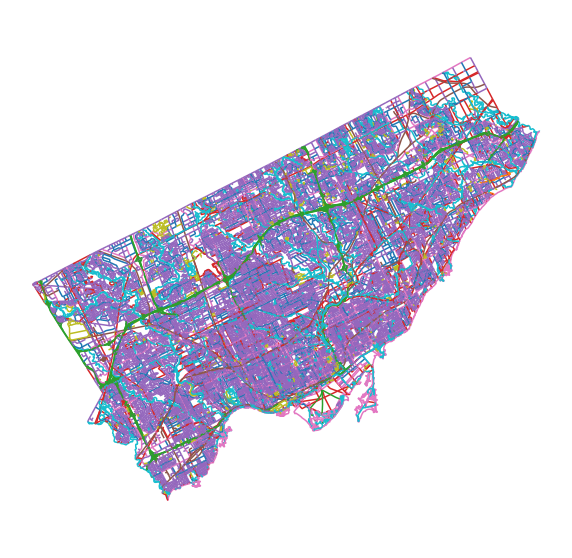

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

tcl.plot(column='FCODE_DESC',
        ax=ax,
        legend=False)

#leg=ax.get_legend()
#leg.set_bbox_to_anchor((1.15, 1))

ax.set_axis_off()
plt.axis('equal')
plt.show();

In [15]:
print(ad_points.shape)
ad_points.head(3)

(526790, 22)


,GEO_ID,LINK,MAINT_STAG,ADDRESS,LFNAME,LONUM,LONUMSUF,HINUM,HINUMSUF,ARC_SIDE,...,FCODE_DES,CLASS,NAME,X,Y,LONGITUDE,LATITUDE,MUN_NAME,WARD_NAME,geometry
0,5729533,5729516,REGULAR,404,Lake Promenade,404,None,0,None,R,...,Low Density Residential,Land,None,301526.896,4827441.250,-79.540536,43.586906,Etobicoke,Etobicoke-Lakeshore,POINT (1316740.502 2402548.575)
1,5729531,5729516,REGULAR,402,Lake Promenade,402,None,0,None,R,...,Low Density Residential,Land,None,301539.058,4827450.035,-79.540385,43.586985,Etobicoke,Etobicoke-Lakeshore,POINT (1316750.904 2402559.360)
2,5729535,5729516,REGULAR,407,Lake Promenade,407,None,0,None,L,...,Low Density Residential,Land,None,301576.469,4827413.878,-79.539922,43.586659,Etobicoke,Etobicoke-Lakeshore,POINT (1316793.869 2402530.020)


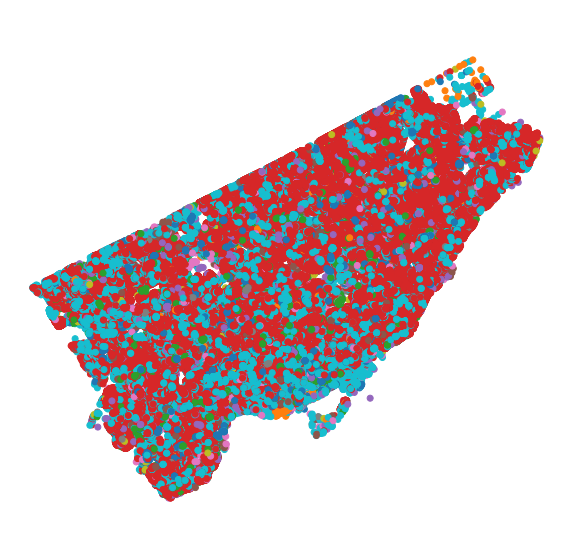

In [17]:
fig, ax = plt.subplots(figsize=(10,10))

ad_points.plot(column='FCODE_DES',
              ax=ax)

ax.set_axis_off()
plt.axis('equal')
plt.show();

In [22]:
# inspecting the diff class of features shown in datasets

print(tcl.FCODE_DESC.unique())
print(len(tcl.FCODE_DESC.unique()))

['Trail' 'Other' 'River' 'Local' 'Major Arterial' 'Laneway'
 'Major Railway' 'Major Shoreline' 'Geostatistical line' 'Collector'
 'Walkway' 'Hydro Line' 'Minor Arterial' 'Expressway' 'Expressway Ramp'
 'Pending' 'Major Arterial Ramp' 'Access Road'
 'Minor Shoreline (Land locked)' 'Ferry Route' 'Busway' 'Collector Ramp'
 'Creek/Tributary' 'Other Ramp' 'Minor Railway' 'Minor Arterial Ramp']
26


In [45]:
lines_to_keep = ['River', 'Creek/Tributary', 'Major Arterial']

tcl = tcl[tcl['FCODE_DESC'].isin(lines_to_keep)]

In [46]:
tcl_palette = {'Creek/Tributary': 'cyan',
              'Major Arterial': 'black',
              'Minor Arterial': 'grey',
              'River': 'blue'}

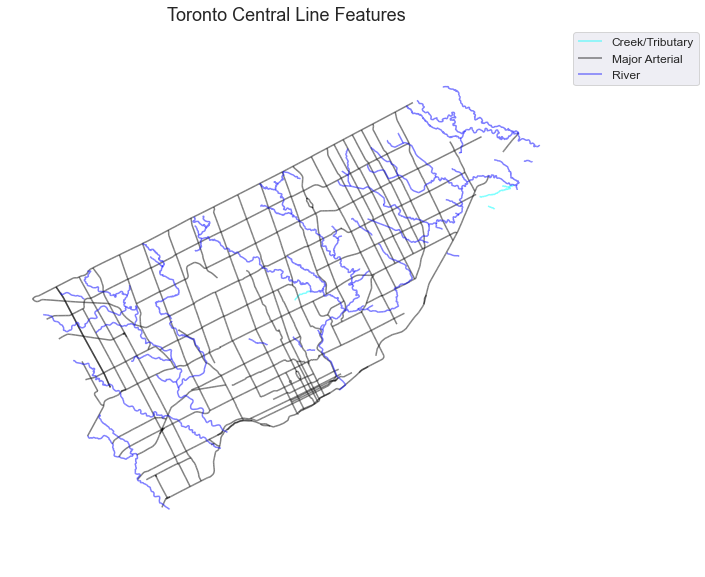

In [47]:
fig, ax = plt.subplots(figsize=(10,10))

for ctype, data in tcl.groupby('FCODE_DESC'):

    color = tcl_palette[ctype]
    
    data.plot(ax=ax,
             legend=True,
             color=color,
             label=ctype,
             alpha=0.5
             )

ax.legend(bbox_to_anchor=(1.25, 1), prop={'size':12})
ax.set(title='Toronto Central Line Features')

ax.set_axis_off()
plt.axis('equal')
plt.show();